# ***VISÃO GERAL DO DATASET***

Este conjunto de dados contém informações de reserva para um hotel urbano e um hotel resort de Portugal e inclui informações como quando a reserva foi feita, duração da estadia, número de adultos, crianças e/ou bebês  entre outras coisas.


In [ ]:
pip install pygal_maps_world

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 7.1 MB/s eta 0:00:00
  Created wheel for pygal_maps_world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278548 sha256=05b3a9e8f97308a20bebceba7efba9d6c5a45a4c6254a6716c3923ff5a6511dc
  Stored in directory: /root/.cache/pip/wheels/d7/c6/6a/0b0546db76e2a8ddf6f4426ba7172755470e7139467676b9ef
Successfully built pygal_maps_world


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pygal.maps.world
import random
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


tabela = pd.read_csv('https://raw.githubusercontent.com/joaovictorferro/Data-Science/main/hotel_bookings.csv')

In [ ]:
tabela.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Linhas e colunas**

In [ ]:
tabela.shape

(119390, 32)

**Nomes das colunas**

In [ ]:
tabela.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# ***PRÉ-PROCESSAMENTO DOS DADOS***


Nesta etapa, irei primeiro fazer uma análise rápida dos dados, como algumas características gerais das colunas e do problema para ver a neccessidade de limpeza e adequação dos dados.

In [ ]:
tabela.shape

(119390, 32)

O nosso banco de dados possui 119390 linhas, com 32 colunas ao todo. Dentre dessas linhas irei analisar os seguintes passos:

1.   **Dados duplicados?**
2.   **Dados ausentes?**
3.   **Necessidade de remoção de Outliers?**
4.   **Necessidade de retirar colunas?**

Ao final desta 4 etapas, partiremos para o próximo tópico.


## 1. Dados duplicados?

Essa etapa é mais simples, e por meio do código abaixo removeremos as linhas duplicadas do DataFrame, mantendo apenas a primeira ocorrência de cada conjunto de valores duplicados e redefinindo os índices do DataFrame.

In [ ]:
tabela=tabela.drop_duplicates(keep='first').reset_index().drop(columns='index')

## 2. Dados ausentes?
Muitos dados ausente podem acabar se tornando um problema futuramente, e para poder tratar isso, inicialmente vamos verificar quais colunas possuem dados ausentes e sua quantidade.

In [ ]:
tabela.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


Podemos observar que há quatro colunas com valores faltantes:

*   Children = 4;
*   Country = 488;
*   Agent = 16340;
*   Company = 112593.

A partir desse resultado, vamos calcular a porcentagem de valores faltantes nessas colunas para determinar se são relevantes ou irrelevantes para a análise.





In [ ]:
(tabela["children"].isnull().sum()*100)/(tabela.shape[0])

0.004576868506567806

In [ ]:
(tabela["country"].isnull().sum()*100)/(tabela.shape[0])

0.5171861412421621

In [ ]:
(tabela["agent"].isnull().sum()*100)/(tabela.shape[0])

13.951439425145315

In [ ]:
(tabela["company"].isnull().sum()*100)/(tabela.shape[0])

93.98256213098998

A coluna "company" se mostrou irrelevante por ter aproximadamente 94% de dados ausentes.


Portanto, vamos eliminá-la e repor os dados faltantes das outras colunas aleatoriamente, para isso vamos utilizar o método random.

In [ ]:
# removendo a coluna "company"
tabela.drop("company",axis=1,inplace=True)

# verificando a nova quantidade de colunas
len(tabela.columns)

31

In [ ]:
arrayChildren = tabela["children"].dropna().unique()
tabela["children"].fillna(random.choice(arrayChildren),inplace=True)

In [ ]:
arrayCountry = tabela["country"].dropna().unique()
tabela["country"].fillna(random.choice(arrayCountry),inplace=True)

In [ ]:
arrayAgent = tabela["agent"].dropna().unique()
tabela["agent"].fillna(random.choice(arrayAgent),inplace=True)

In [ ]:
tabela.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Com isso conseguimos ajustar a tabela fazendo com que nenhuma coluna possua mais dados faltantes.

## 3.   Necessidade de remoção de Outliers?




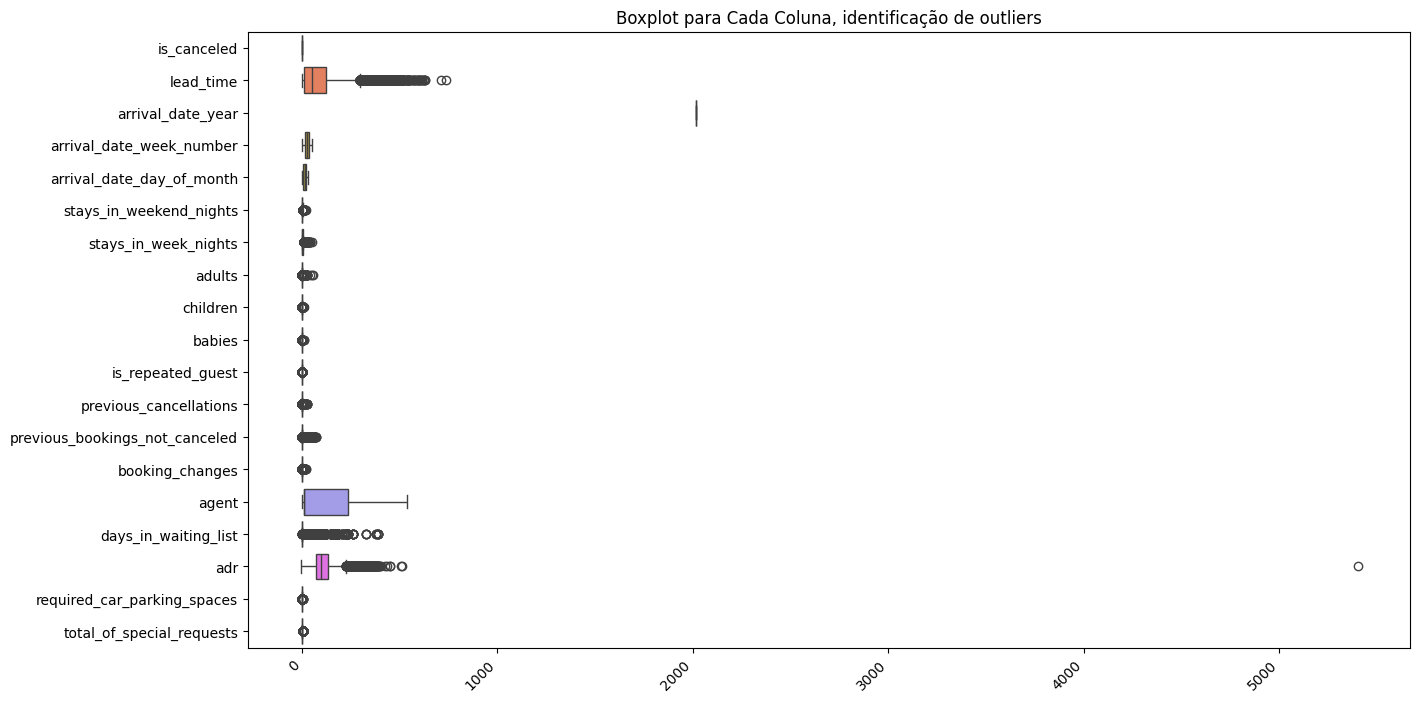

In [ ]:
# Configurações para melhor visualização
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Criação do boxplot para cada coluna
sns.boxplot(data=tabela, orient='h')

plt.title('Boxplot para Cada Coluna, identificação de outliers')
plt.show()

É possível observar que uma quantidade sifnificativa de colunas possuem outliers, mas é preciso se questionar, até onde eles influenciarão de maneira negativa?

Provavelmente, nesse caso, os outliers estão aí não por erro ou por serem dados estranhos, e sim por ocorrerem em frequências não regulares. Portanto, não iremos mexer nos dados para a retirada dos outliers.

## 4. Necessidade de remoção de colunas?



Como visto no tópico 1, a coluna "agent" possui 94.3% dos seus dados faltando, e por isso ela foi a única coluna a ser removida durante o pré-processamento, as outras foram apenas tratadas.

# **INSIGHTS**

### **Usando técnicas de Estatísticas**

Essa etapa é importante para conseguir inferir algumas informações sobre os dados e tentar achar relações entre eles.

In [ ]:
# Estatísticas descritivas para todas as colunas
desc_stats = tabela.describe()

# Converte as estatísticas descritivas em uma tabela formatada
table = tabulate(desc_stats, headers='keys', tablefmt='pretty')

# Exibe a tabela
print(table)

+-------+---------------------+-------------------+--------------------+--------------------------+---------------------------+-------------------------+----------------------+--------------------+---------------------+----------------------+---------------------+------------------------+--------------------------------+---------------------+--------------------+----------------------+--------------------+-----------------------------+---------------------------+
|       |     is_canceled     |     lead_time     | arrival_date_year  | arrival_date_week_number | arrival_date_day_of_month | stays_in_weekend_nights | stays_in_week_nights |       adults       |      children       |        babies        |  is_repeated_guest  | previous_cancellations | previous_bookings_not_canceled |   booking_changes   |       agent        | days_in_waiting_list |        adr         | required_car_parking_spaces | total_of_special_requests |
+-------+---------------------+-------------------+-------------

### **Observando a Matriz de Correlação**

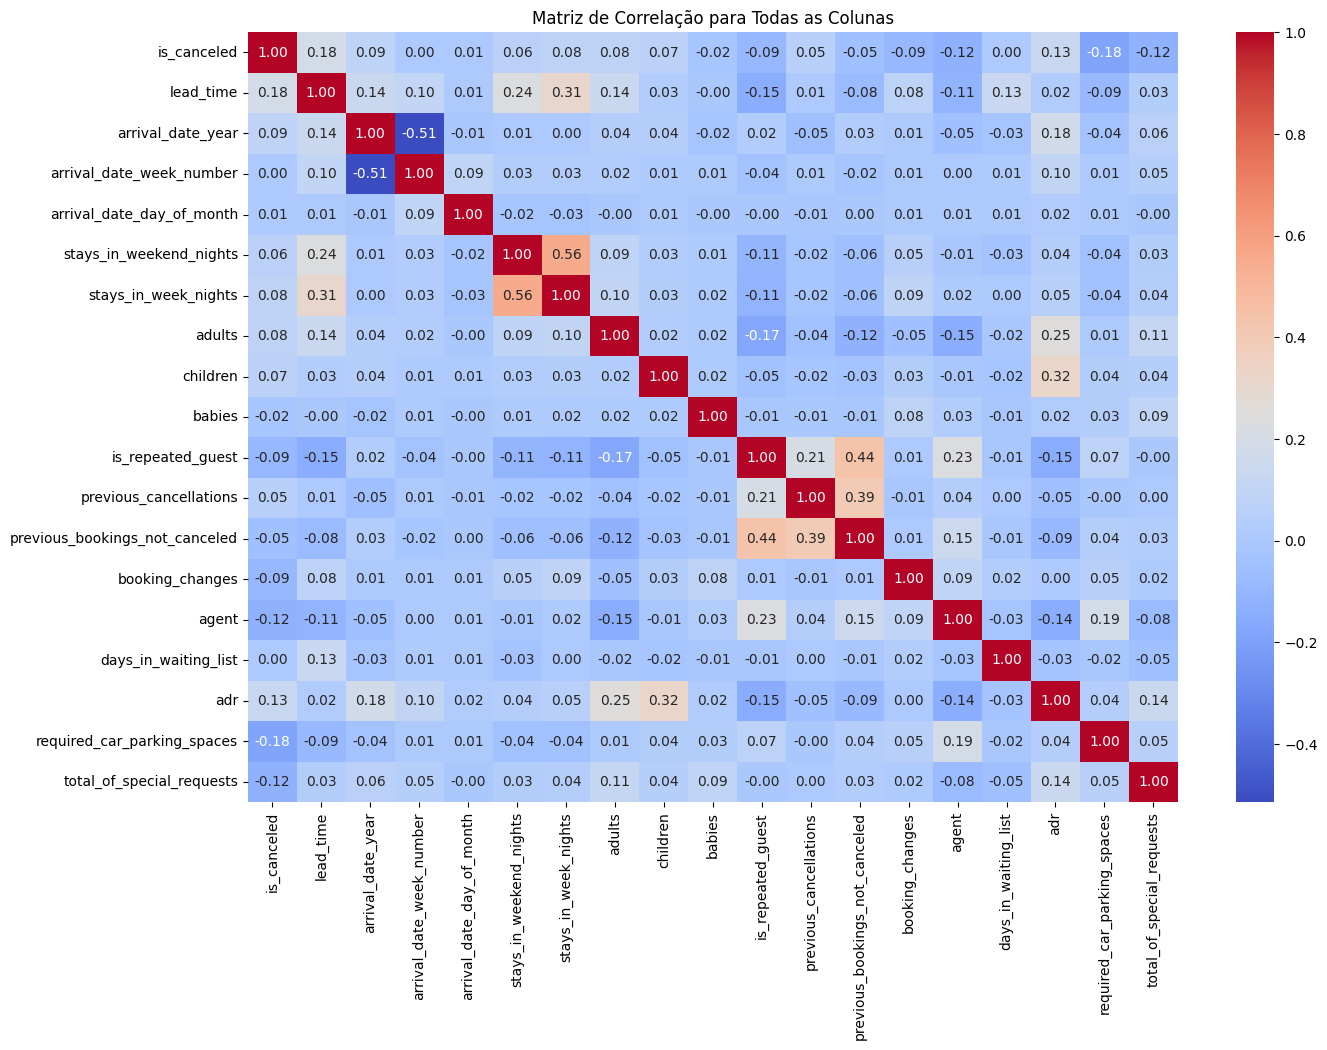

In [ ]:
# Matriz de correlação para todas as colunas
corr_matrix = tabela.corr()
# print(corr_matrix)
# Visualizar matriz de correlação com um heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para Todas as Colunas')
plt.show()

### **Número de hotéis urbanos e resorts e suas taxas de cancelamento**

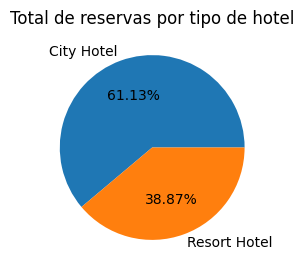

In [ ]:
plt.rcParams['figure.figsize']=[3,3]
plt.pie(tabela.hotel.value_counts().values,labels=tabela.hotel.value_counts().index,autopct='%.2f%%')
plt.title('Total de reservas por tipo de hotel')
plt.show()

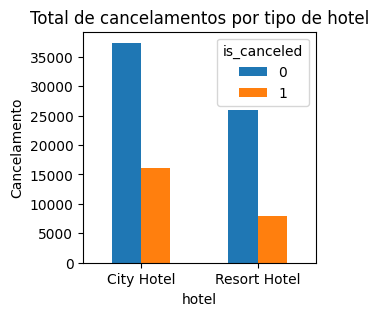

In [ ]:
pd.crosstab(tabela.hotel,tabela.is_canceled).plot.bar()
plt.rcParams['figure.figsize']=[3,3]
plt.title('Total de cancelamentos por tipo de hotel')
plt.ylabel('Cancelamento')
plt.xticks(rotation=0)
plt.show()

Podemos perceber que existem mais cancelamentos em hotéis urbanos que em resorts, isso pode ser explicado pelo maior número de reservas em hotéis urbanos. Para uma análise mais detalhada, vamos olhar a porcentagem por tipo de hotel.

In [ ]:
tbl = pd.crosstab(tabela.hotel,tabela.is_canceled,margins=True)
display(tbl)

is_canceled,0,1,All
hotel,,,
City Hotel,37379,16049,53428
Resort Hotel,25992,7976,33968
All,63371,24025,87396


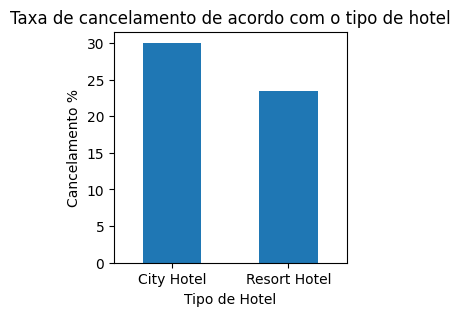

In [ ]:
tbl['cancelamento_percentual']=tbl[1]*100/tbl['All']

tbl.drop('All',axis=0)['cancelamento_percentual'].plot.bar()
plt.title('Taxa de cancelamento de acordo com o tipo de hotel')
plt.xlabel('Tipo de Hotel')
plt.xticks(rotation=0)
plt.ylabel('Cancelamento %')
plt.show()

Há uma taxa de cancelamento de 30% no hotel urbano e aproximadamente 23% no resort hotel.

### **Status das reservas divididas pelos tipos de hotel**

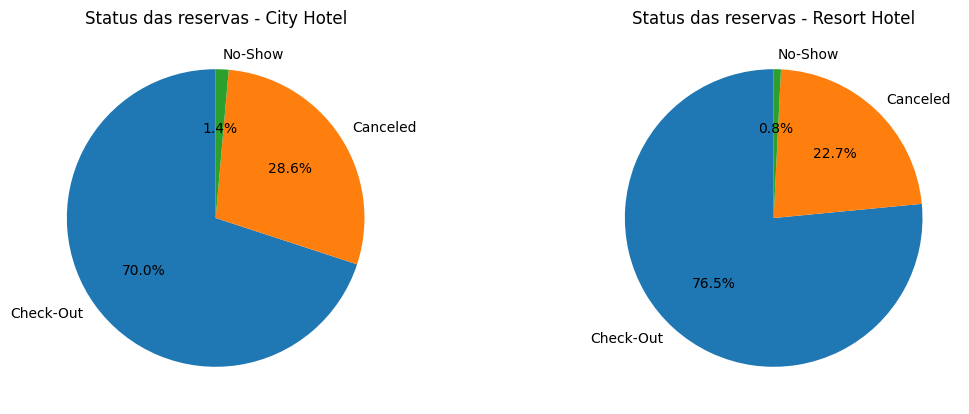

In [ ]:
# Filtrar o DataFrame para CITY HOTEL
city_hotel_data = tabela[tabela['hotel'] == 'City Hotel']
city_hotel_reservation_status = city_hotel_data['reservation_status'].value_counts()

# Filtrar o DataFrame para RESORT HOTEL
resort_hotel_data = tabela[tabela['hotel'] == 'Resort Hotel']
resort_hotel_reservation_status = resort_hotel_data['reservation_status'].value_counts()

# Configurar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Ajuste o tamanho conforme necessário
plt.subplots_adjust(wspace=0.5)  # Ajuste o espaçamento horizontal entre os subplots

# Gráfico de pizza para CITY HOTEL
axs[0].pie(city_hotel_reservation_status, labels=city_hotel_reservation_status.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Status das reservas - City Hotel')

# Gráfico de pizza para RESORT HOTEL
axs[1].pie(resort_hotel_reservation_status, labels=resort_hotel_reservation_status.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Status das reservas - Resort Hotel')

plt.show()

É possível ver que o Resort Hotel possue menos ocorrências de cancelamentos e não aparecimento por parte dos clientes.

A razão disso pode ser explicada por assumir que nas viagens para o resort ocorrem sempre uma preparação e organização a mais por parte dos clietes, aumentado assim o número de check-outs.

### **Coparação da quantidade de cancelamento de acordo com o tipo de quarto**

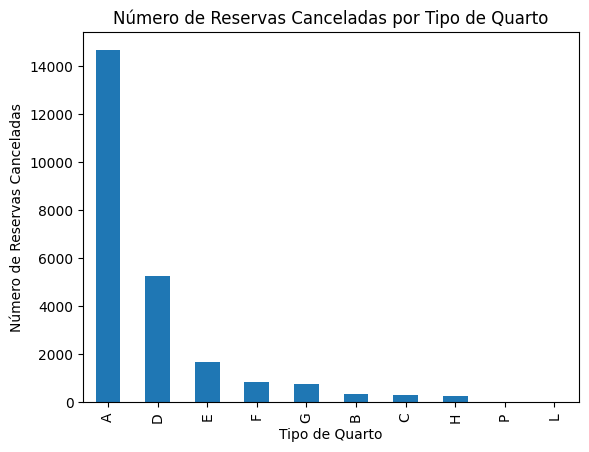

In [ ]:
# Filtrar DataFrame para as reservas canceladas
canceled_reservations = tabela[tabela['is_canceled'] == 1]

# Contar o número de reservas canceladas por tipo de quarto
canceled_by_room_type = canceled_reservations['reserved_room_type'].value_counts()

# Plotar o gráfico de barras
canceled_by_room_type.plot(kind='bar', color='#1f77b4')
plt.title('Número de Reservas Canceladas por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Reservas Canceladas')
plt.show()


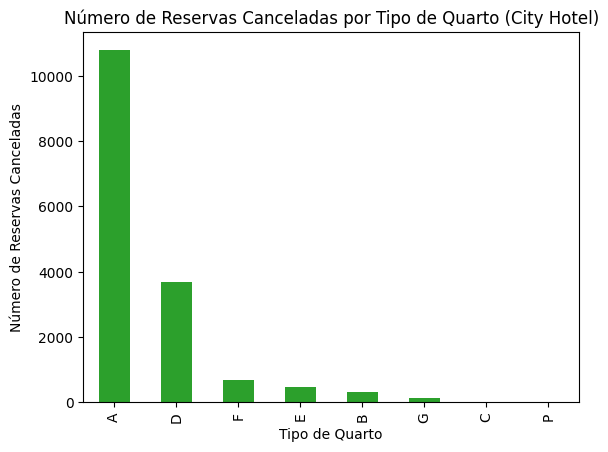

In [ ]:
# Filtrar o DataFrame para CITY HOTEL
city_hotel_data = tabela[tabela['hotel'] == 'City Hotel']

# Filtrar DataFrame para as reservas canceladas
canceled_reservations_city = city_hotel_data[city_hotel_data['is_canceled'] == 1]

# Contar o número de reservas canceladas por tipo de quarto
canceled_by_room_type_city = canceled_reservations_city['reserved_room_type'].value_counts()

# Definir uma paleta de cores personalizada
colors = sns.color_palette("husl", len(canceled_by_room_type))

# Plotar o gráfico de barras
canceled_by_room_type_city.plot(kind='bar', color='#2ca02c')
plt.title('Número de Reservas Canceladas por Tipo de Quarto (City Hotel)')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Reservas Canceladas')
plt.show()

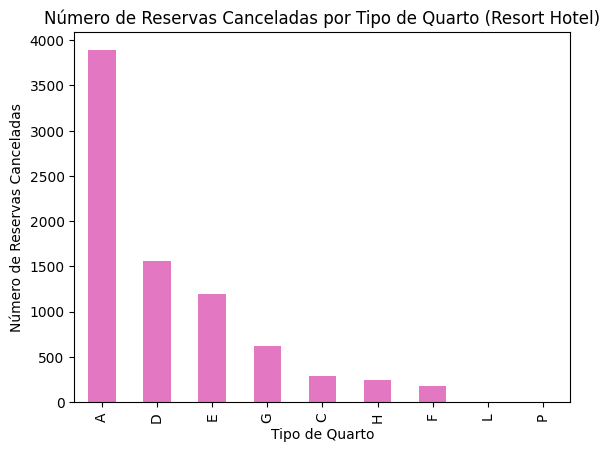

In [ ]:
# Filtrar o DataFrame para RESORT HOTEL
resort_hotel_data = tabela[tabela['hotel'] == 'Resort Hotel']

# Filtrar DataFrame para as reservas canceladas
canceled_reservations_resort = resort_hotel_data[resort_hotel_data['is_canceled'] == 1]

# Contar o número de reservas canceladas por tipo de quarto
canceled_by_room_type_resort = canceled_reservations_resort['reserved_room_type'].value_counts()

# Definir uma paleta de cores personalizada
colors = sns.color_palette("husl", len(canceled_by_room_type))

# Plotar o gráfico de barras
canceled_by_room_type_resort.plot(kind='bar', color='#e377c2')
plt.title('Número de Reservas Canceladas por Tipo de Quarto (Resort Hotel)')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Reservas Canceladas')
plt.show()


- Observação sobre o quarto A e seu desempenho de cancelamento, proporciona a necessidade dos hóteis buscarem a melhoria do mesmo.

- Apesar de não ser tão grande quanto o A, o quarto D também possui uma quantidade significativa de cancelamentos em ambos os hotéis.

### **Comparação entre os tipos de quartos Reserved vs Assigned**

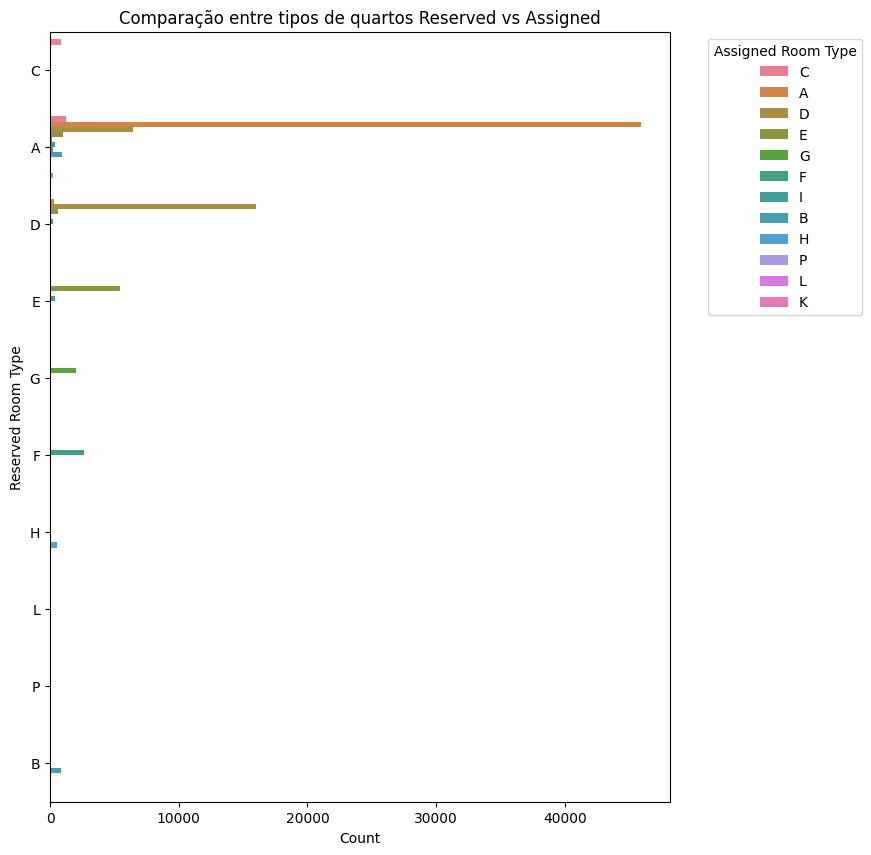

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y='reserved_room_type', hue='assigned_room_type', data=tabela)
plt.xlabel('Count')
plt.ylabel('Reserved Room Type')
plt.title('Comparação entre tipos de quartos Reserved vs Assigned')
plt.legend(title='Assigned Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Entendendo a distribuição dos segmentos de mercado**

In [ ]:
value_counts = tabela['market_segment'].value_counts()


fig = px.pie(
    names=value_counts.index,
    values=value_counts.values,
    hole=0.3,
)


fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0],
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)

fig.update_layout(
    title="Distribuição do Segmento de Mercado",
    showlegend=False,
    annotations=[
        dict(text='Market Segment', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),
)


fig.show()

Esse gráfico se refere à segmentação de mercado, indicando de onde ou como os clientes reservaram seus hotéis. Nesse caso temos as seguintes opções:

* Direct: Os clientes fizeram a reserva diretamente através do site ou contato direto com o hotel, sem intermediários.

* Corporate: Reservas feitas por empresas para viagens de negócios. Muitas vezes, as empresas têm acordos ou parcerias com hotéis para acomodar seus funcionários em viagens a trabalho.

* Online TA (Travel Agency): Reservas feitas através de agências de viagens online. Os clientes utilizam plataformas online de reservas para encontrar e reservar acomodações.

* Offline TA/TO (Travel Agency/Tour Operator): Reservas feitas através de agências de viagens ou operadores turísticos, mas não online. Pode envolver serviços de agências tradicionais.

* Complementary: Reservas que são complementares a outros serviços ou eventos. Por exemplo, reservas vinculadas a pacotes turísticos ou eventos específicos.

* Groups: Reservas relacionadas a grupos, como excursões ou eventos especiais.

* Undefined: Caso em que o segmento de mercado não está claramente definido ou não foi especificado.

* Aviation: Reservas associadas a companhias aéreas, por exemplo, quando os hotéis estão ligados a serviços de transporte aéreo.

É possível ver uma dominância por parte da 'Online TA', possuindo cerca de 59,1% das reservas feitas através dessas agências de viagens online.

Esse gráfico é importante pois nos mostra por onde estão obtendo mais resultados e onde podem focar ainda mais seus investimentos buscando alcançar novas pessoas.

In [ ]:
# Filtrar o DataFrame para CITY HOTEL
city_hotel_data = tabela[tabela['hotel'] == 'City Hotel']

# Filtrar o DataFrame para RESORT HOTEL
resort_hotel_data = tabela[tabela['hotel'] == 'Resort Hotel']

# Agrupar por 'market_segment' e criar um dicionário de DataFrames separados por segmento de mercado
city_hotel_data_by_segment = {segment: group for segment, group in city_hotel_data.groupby('market_segment')}

# Agrupar por 'market_segment' e criar um dicionário de DataFrames separados por segmento de mercado
resort_hotel_data_by_segment = {segment: group for segment, group in resort_hotel_data.groupby('market_segment')}


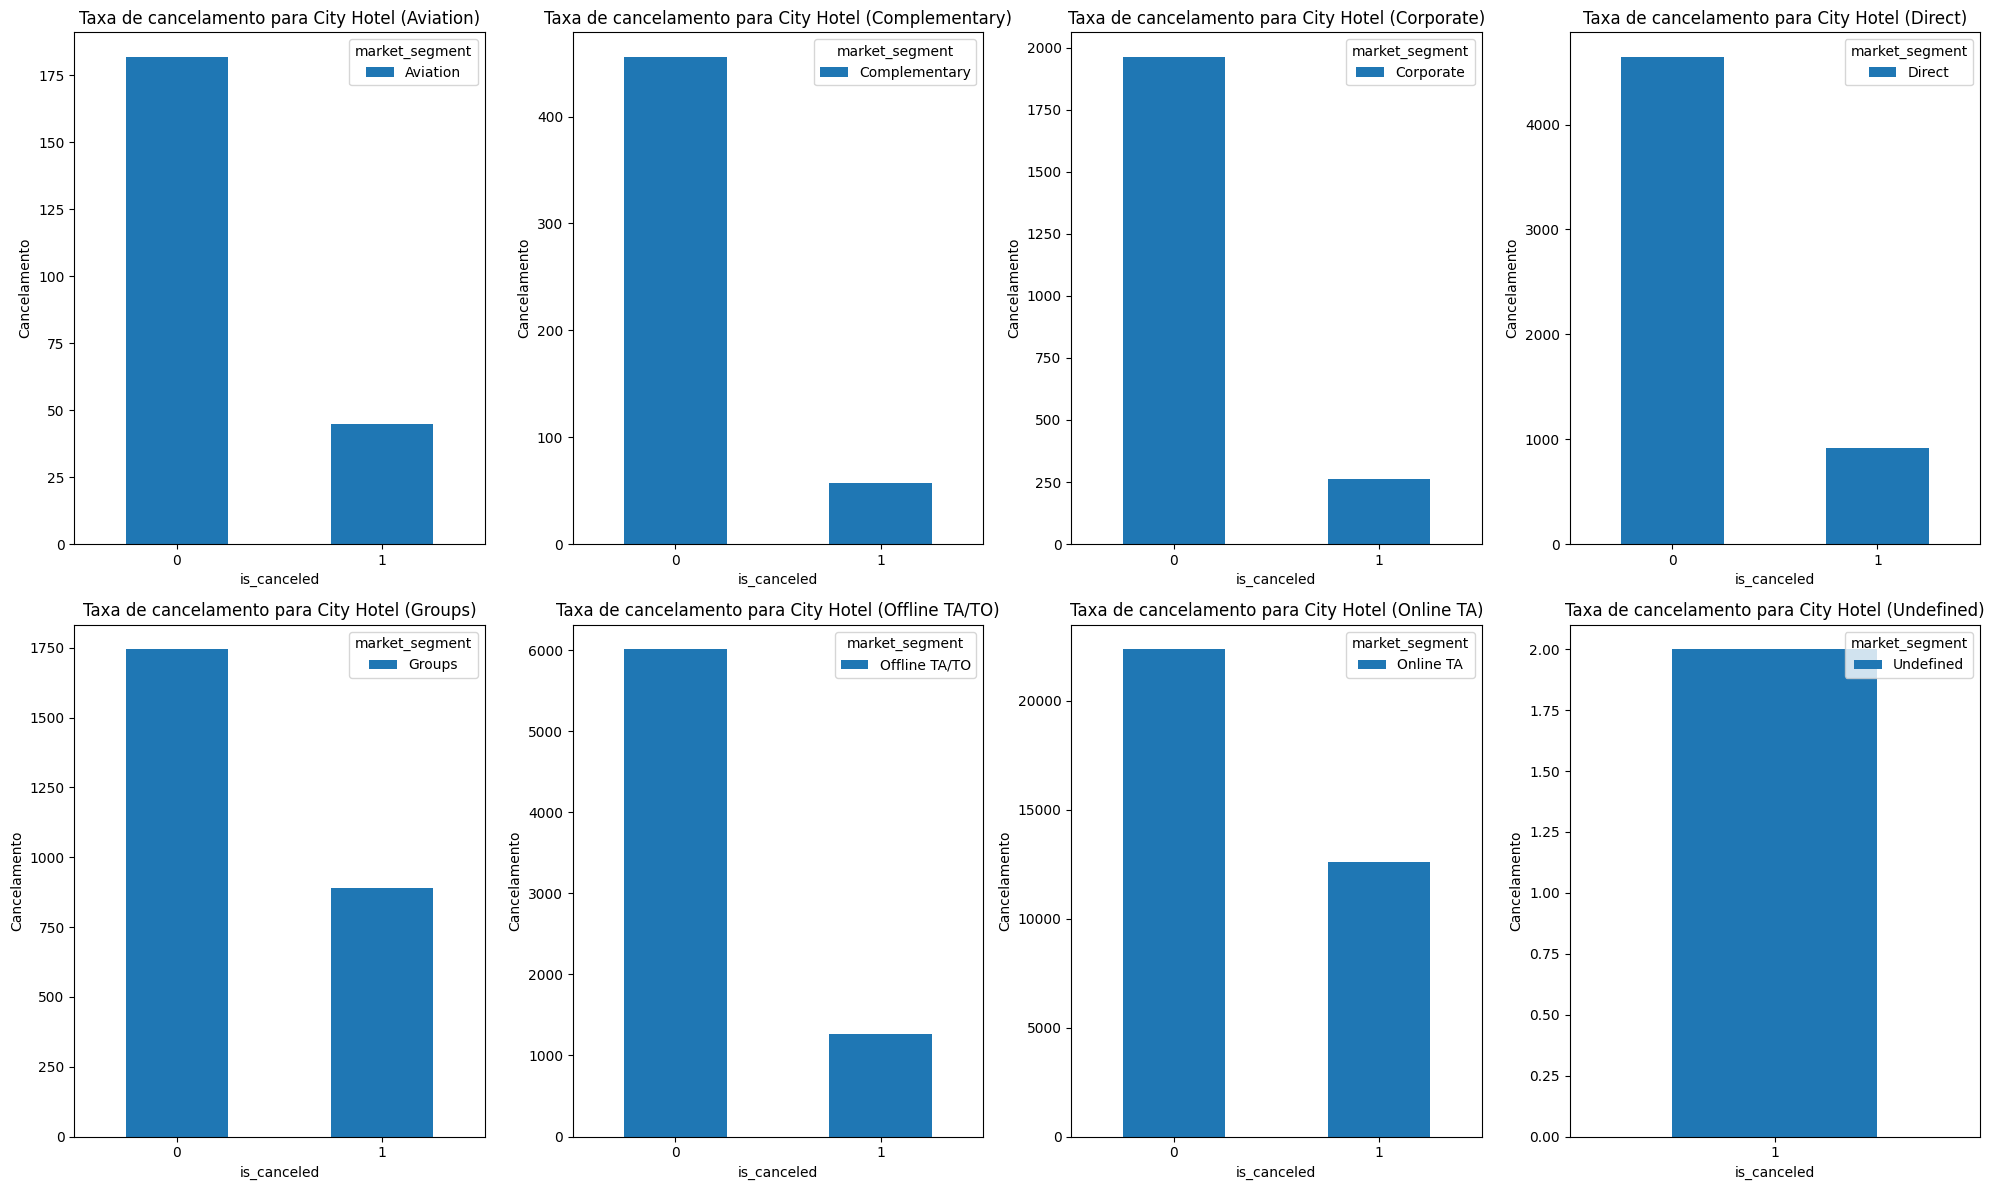

In [ ]:
import matplotlib.pyplot as plt

# Definir o tamanho padrão do gráfico
plt.rcParams['figure.figsize'] = [20, 12]

# Iterar sobre os DataFrames dentro do dicionário city_hotel_data_by_segment
fig, axes = plt.subplots(2, 4)

# Contador para controlar a posição dos subplots
counter = 0

for segment, data in city_hotel_data_by_segment.items():
    # Calcular a tabela cruzada da taxa de cancelamento para o segmento de mercado atual
    crosstab_data = pd.crosstab(data['is_canceled'], data['market_segment'])
    # Plotar o gráfico de barras
    crosstab_data.plot(kind='bar', ax=axes[counter // 4, counter % 4])
    # Configurar o título
    axes[counter // 4, counter % 4].set_title(f'Taxa de cancelamento para City Hotel ({segment})')
    # Configurar o rótulo do eixo y
    axes[counter // 4, counter % 4].set_ylabel('Cancelamento')
    # Rotacionar os rótulos do eixo x
    axes[counter // 4, counter % 4].set_xticklabels(crosstab_data.index, rotation=0)
    # Atualizar o contador
    counter += 1

# Ajustar o layout
plt.tight_layout()
# Exibir o gráfico
plt.show()


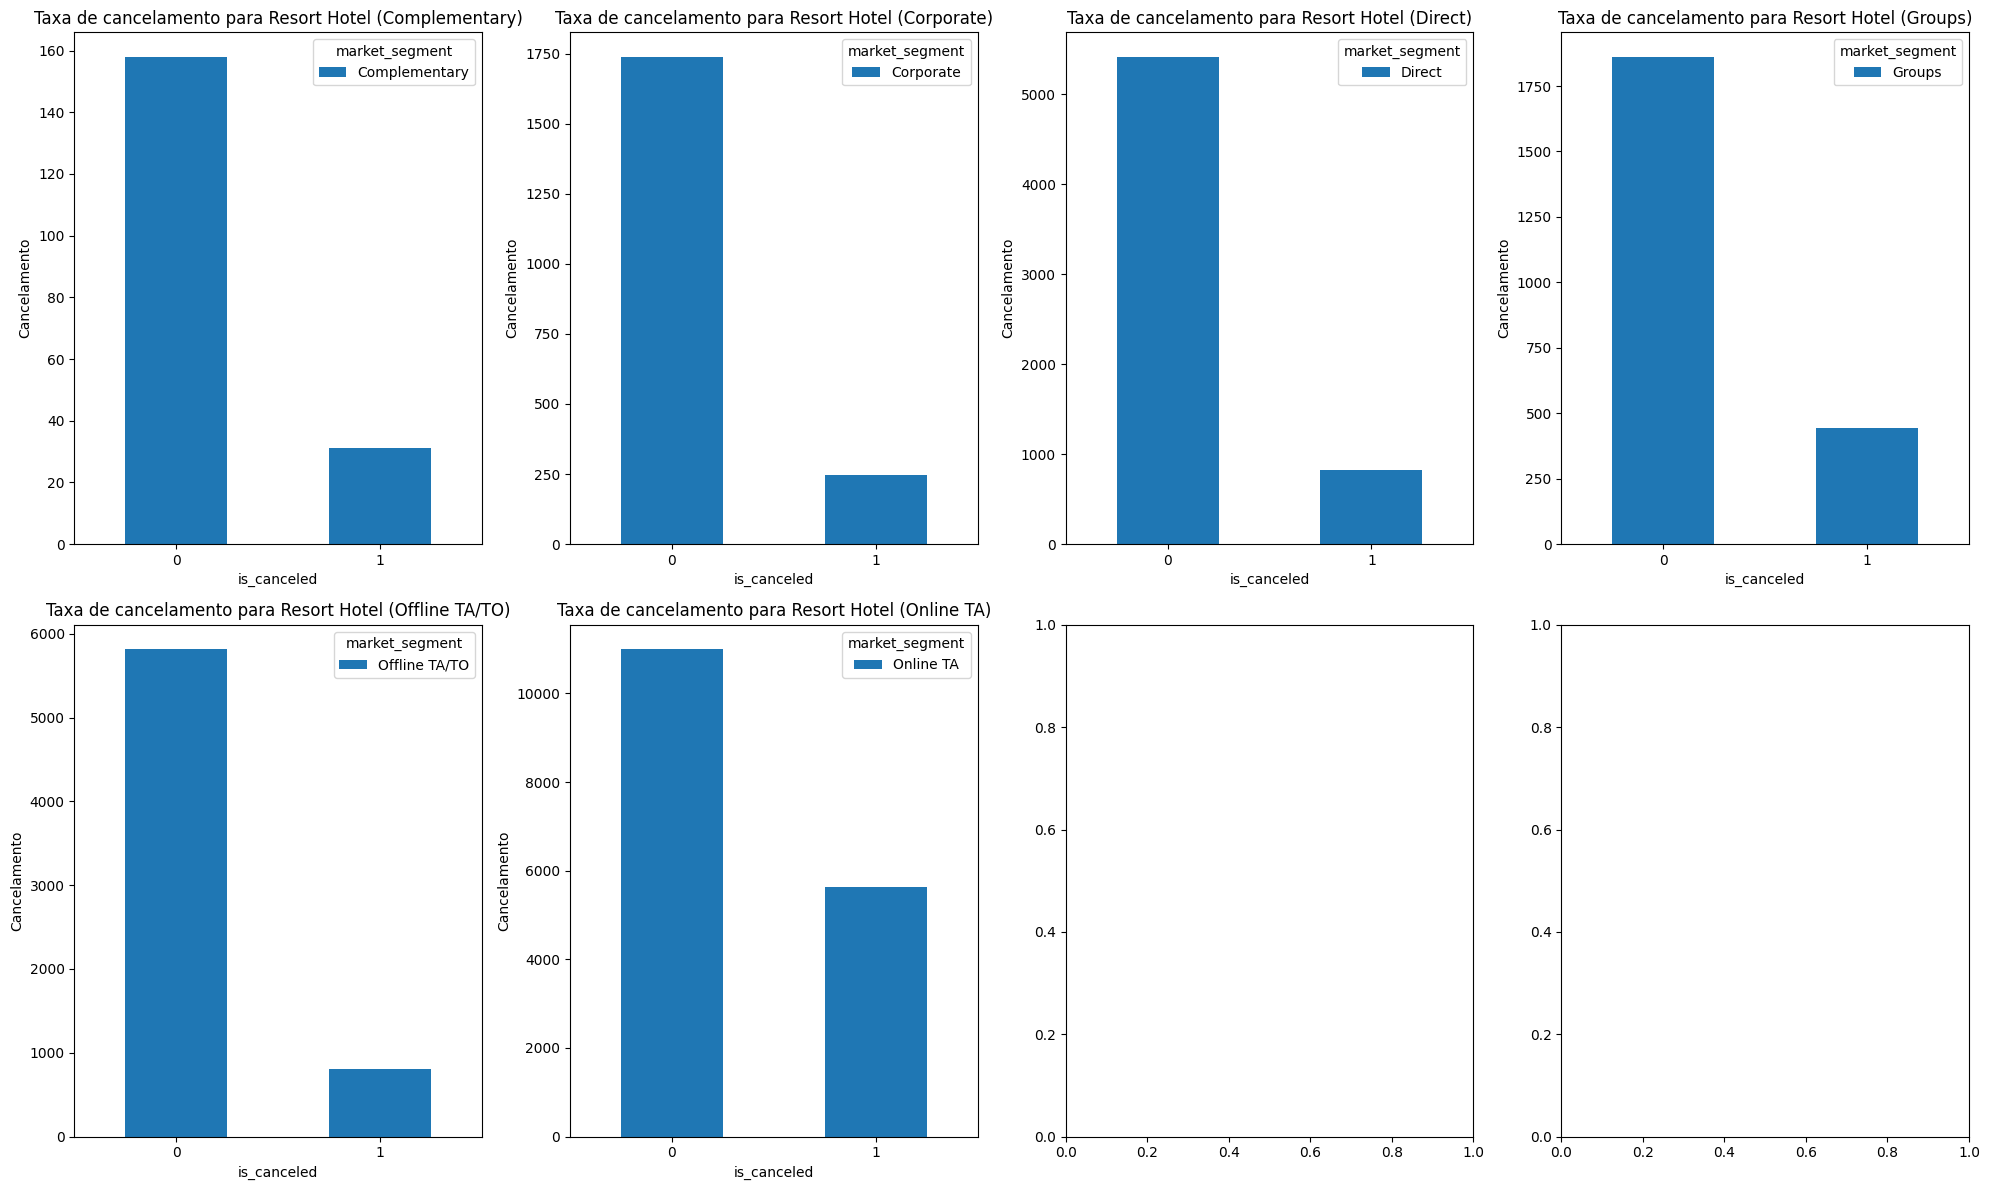

In [ ]:
# Iterar sobre os DataFrames dentro do dicionário resort_hotel_data_by_segment
fig, axes = plt.subplots(2, 4)

# Contador para controlar a posição dos subplots
counter = 0

for segment, data in resort_hotel_data_by_segment.items():
    # Calcular a tabela cruzada da taxa de cancelamento para o segmento de mercado atual
    crosstab_data = pd.crosstab(data['is_canceled'], data['market_segment'])
    # Plotar o gráfico de barras
    crosstab_data.plot(kind='bar', ax=axes[counter // 4, counter % 4])
    # Configurar o título
    axes[counter // 4, counter % 4].set_title(f'Taxa de cancelamento para Resort Hotel ({segment})')
    # Configurar o rótulo do eixo y
    axes[counter // 4, counter % 4].set_ylabel('Cancelamento')
    # Rotacionar os rótulos do eixo x
    axes[counter // 4, counter % 4].set_xticklabels(crosstab_data.index, rotation=0)
    # Atualizar o contador
    counter += 1

# Ajustar o layout
plt.tight_layout()
# Exibir o gráfico
plt.show()


### **Quais são os meses com o maior número de reservas?**

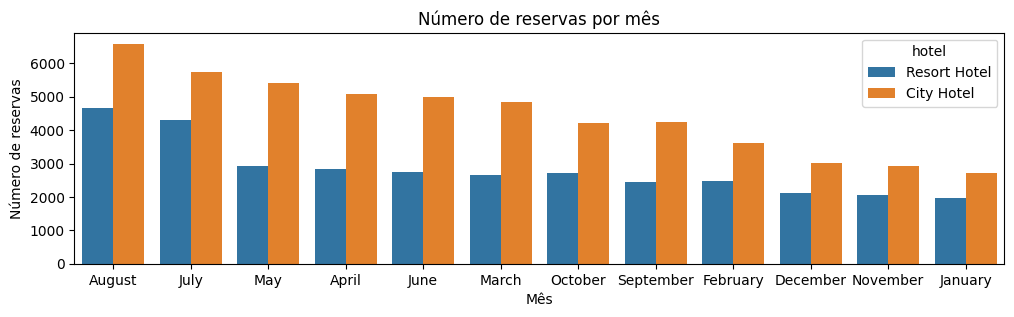

In [ ]:
plt.rcParams['figure.figsize']=[12,3]
sns.countplot(x='arrival_date_month', data=tabela, order=tabela.arrival_date_month.value_counts().index, hue='hotel')
plt.title('Número de reservas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de reservas')
plt.show()

Visualizando o gráfico, podemos perceber que os meses com maior número de reservas são julho e agosto (tanto para hotéis urbanos como para resorts), isso se deve ao fato de que esses são os meses de verão em Portugal, seguido de maio e abirl, meses de primavera em que o clima é mais ameno e é considerado alta temporada. Já os meses de novembro, dezembro e janeiro registram os menores números de reservas, pelo fato do clima nessa parte do mundo, tendo algumas regiões um inverno extremamente rigoroso.

### **Taxas de cancelamento e reservas ao longo dos anos**

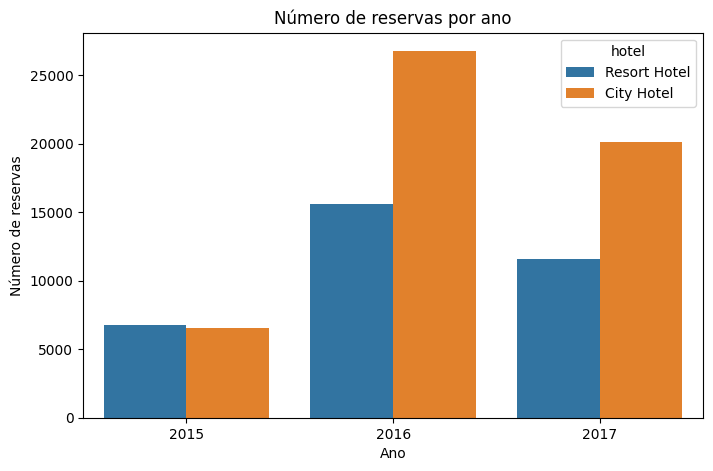

In [ ]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=tabela,hue='hotel')
plt.xlabel('Ano')
plt.ylabel('Número de reservas')
plt.title('Número de reservas por ano')
plt.show()

In [ ]:
tbl2=pd.crosstab(tabela.arrival_date_year,tabela.is_canceled,margins=True)
tbl2['cancel-percent'] = (tbl2[1]*100)/tbl2['All']
tbl2

is_canceled,0,1,All,cancel-percent
arrival_date_year,,,,
2015,10609,2704,13313,20.310974
2016,31183,11208,42391,26.439574
2017,21579,10113,31692,31.910261
All,63371,24025,87396,27.489816


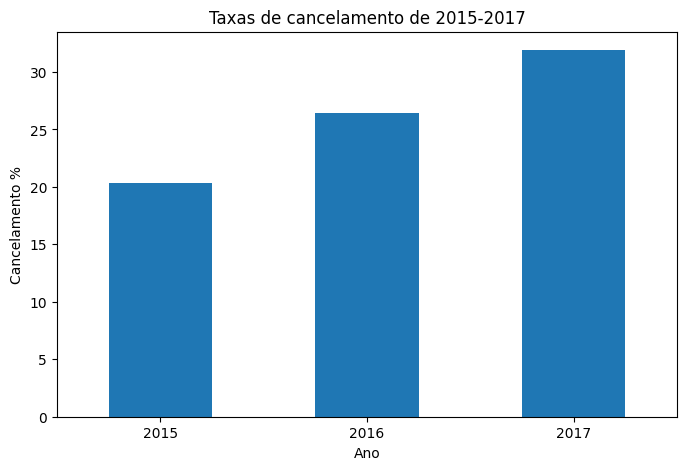

In [ ]:
tbl2.drop('All',axis=0)['cancel-percent'].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Ano')
plt.ylabel('Cancelamento %')
plt.title('Taxas de cancelamento de 2015-2017')
plt.show()

Com o auxílio do gráfico vemos claramente um aumento nos cancelamentos das reservas ao longo dos anos. Isso sugere algum tipo de insatisfação recorrente dos clientes. Pedir pelo seu feedback e aplicá-lo é uma boa maneira de contornar a situação.

### **Estudando os países**

In [ ]:
tabela.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'IRN', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
# Dicionário de conversão de códigos de país de 3 letras para 2 letras
country_code_conversion = {
    'PRT': 'pt', 'GBR': 'gb','USA': 'us','ESP': 'es','IRL': 'ie','FRA': 'fr','SYC': 'sc','ROU': 'ro','NOR': 'no','OMN': 'om','ARG': 'ar','POL': 'pl','DEU': 'de','BEL': 'be','CHE': 'ch','CN': 'cn','GRC': 'gr','ITA': 'it','NLD': 'nl','DNK': 'dk','RUS': 'ru','SWE': 'se','AUS': 'au','EST': 'ee','CZE': 'cz','BRA': 'br','FIN': 'fi','MOZ': 'mz','BWA': 'bw','LUX': 'lu','SVN': 'si','ALB': 'al','IND': 'in',
    'CHN': 'cn','MEX': 'mx','MAR': 'ma','UKR': 'ua','SMR': 'sm','LVA': 'lv','PRI': 'pr','SRB': 'rs','CHL': 'cl','AUT': 'at','BLR': 'by','LTU': 'lt','TUR': 'tr','ZAF': 'za','AGO': 'ao','ISR': 'il','CYM': 'ky','ZMB': 'zm','CPV': 'cv','ZWE': 'zw','DZA': 'dz','KOR': 'kr','CRI': 'cr','HUN': 'hu','ARE': 'ae','TUN': 'tn','JAM': 'jm','HRV': 'hr','HKG': 'hk','IRN': 'ir','GEO': 'ge','AND': 'ad','GIB': 'gi',
    'URY': 'uy','JEY': 'je','CAF': 'cf','CYP': 'cy','COL': 'co','GGY': 'gg','KWT': 'kw','NGA': 'ng','MDV': 'mv','VEN': 've','SVK': 'sk','FJI': 'fj','KAZ': 'kz','PAK': 'pk','IDN': 'id','LBN': 'lb', 'PHL': 'ph','SEN': 'sn','AZE': 'az','BHR': 'bh','NZL': 'nz','THA': 'th','DOM': 'do','MKD': 'mk','MYS': 'my','ARM': 'am','JPN': 'jp','LKA': 'lk','CUB': 'cu','CMR': 'cm','BIH': 'ba','MUS': 'mu','COM': 'km',
    'SUR': 'sr','UGA': 'ug','BGR': 'bg','CIV': 'ci','JOR': 'jo','SYR': 'sy','SGP': 'sg','BDI': 'bi','SAU': 'sa','VNM': 'vn','PLW': 'pw', 'QAT': 'qa','EGY': 'eg', 'PER': 'pe','MLT': 'mt', 'MWI': 'mw', 'ECU': 'ec','MDG': 'mg', 'ISL': 'is', 'UZB': 'uz', 'NPL': 'np', 'BHS': 'bs', 'MAC': 'mo', 'TGO': 'tg','TWN': 'tw', 'DJI': 'dj', 'STP': 'st', 'KNA': 'kn','ETH': 'et', 'IRQ': 'iq', 'HND': 'hn', 'RWA': 'rw',
    'KHM': 'kh', 'MCO': 'mc', 'BGD': 'bd', 'IMN': 'im', 'TJK': 'tj', 'NIC': 'ni', 'BEN': 'bj', 'VGB': 'vg', 'TZA': 'tz','GAB': 'ga', 'GHA': 'gh', 'TMP': 'tl', 'GLP': 'gp', 'KEN': 'ke','LIE': 'li', 'GNB': 'gw','MNE': 'me','UMI': 'um','MYT': 'yt','FRO': 'fo','MMR': 'mm','PAN': 'pa','BFA': 'bf','LBY': 'ly','MLI': 'ml','NAM': 'na','BOL': 'bo','PRY': 'py','BRB': 'bb','ABW': 'aw','AIA': 'ai','SLV': 'sv','DMA': 'dm',
    'PYF': 'pf','GUY': 'gy','LCA': 'lc','ATA': 'aq','GTM': 'gt','ASM': 'as','MRT': 'mr','NCL': 'nc','KIR': 'ki','SDN': 'sd','ATF': 'tf','SLE': 'sl','LAO': 'la'
}

tabela2 = pd.DataFrame()
tabela2['country'] = tabela['country'].map(country_code_conversion)

tabela2['country'].unique()

array(['pt', 'gb', 'us', 'es', 'ie', 'fr', 'ir', 'ro', 'no', 'om', 'ar',
       'pl', 'de', 'be', 'ch', 'cn', 'gr', 'it', 'nl', 'dk', 'ru', 'se',
       'au', 'ee', 'cz', 'br', 'fi', 'mz', 'bw', 'lu', 'si', 'al', 'in',
       'mx', 'ma', 'ua', 'sm', 'lv', 'pr', 'rs', 'cl', 'at', 'by', 'lt',
       'tr', 'za', 'ao', 'il', 'ky', 'zm', 'cv', 'zw', 'dz', 'kr', 'cr',
       'hu', 'ae', 'tn', 'jm', 'hr', 'hk', 'ge', 'ad', 'gi', 'uy', 'je',
       'cf', 'cy', 'co', 'gg', 'kw', 'ng', 'mv', 've', 'sk', 'fj', 'kz',
       'pk', 'id', 'lb', 'ph', 'sn', 'sc', 'az', 'bh', 'nz', 'th', 'do',
       'mk', 'my', 'am', 'jp', 'lk', 'cu', 'cm', 'ba', 'mu', 'km', 'sr',
       'ug', 'bg', 'ci', 'jo', 'sy', 'sg', 'bi', 'sa', 'vn', 'pw', 'qa',
       'eg', 'pe', 'mt', 'mw', 'ec', 'mg', 'is', 'uz', 'np', 'bs', 'mo',
       'tg', 'tw', 'dj', 'st', 'kn', 'et', 'iq', 'hn', 'rw', 'kh', 'mc',
       'bd', 'im', 'tj', 'ni', 'bj', 'vg', 'tz', 'ga', 'gh', 'tl', 'gp',
       'ke', 'li', 'gw', 'me', 'um', 'yt', 'fo', 'm

In [ ]:
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

In [ ]:
def country_bin(x):
    if x in europe:
        return 'Europa'
    elif x in north_a:
        return 'América Do Norte'
    elif x in south_a:
        return 'América do Sul'
    elif x in asia:
        return 'Ásia'
    elif x in africa:
        return 'África'
    elif x in australia:
        return 'Oceania'
    elif x in Others:
        return 'Outros'
tabela.country=tabela.country.apply(country_bin)

In [ ]:
tabela.country.unique()

array(['Europa', 'América Do Norte', 'Ásia', 'América do Sul', 'Oceania',
       'África', 'Outros'], dtype=object)

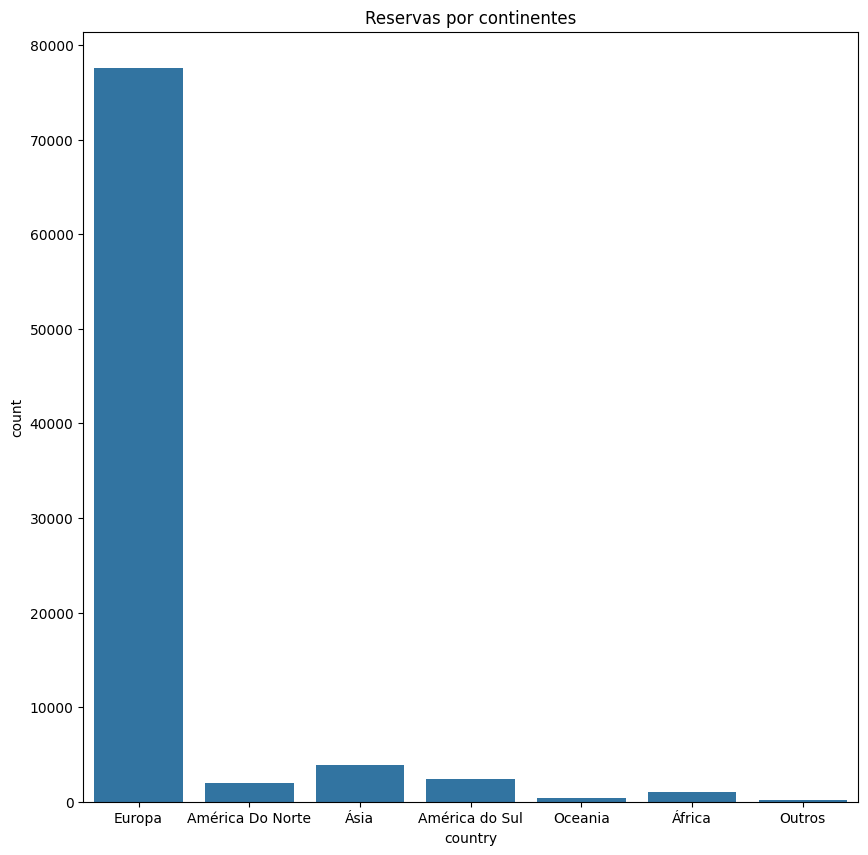

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='country',data=tabela)
plt.title('Reservas por continentes')
plt.show()

Pelo gráfico, vemos que a maior parte das reservas vêm da Europa, devido ao fato dos hotéis em questão estarem localizados em Portugal.


In [ ]:
tbl=pd.crosstab(tabela.country,tabela.is_canceled,margins=True)
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
country,,,,
América Do Norte,1531,474,2005,23.640898
América do Sul,1600,847,2447,34.613813
Europa,56585,20948,77533,27.018173
Oceania,286,92,378,24.338624
Outros,106,53,159,33.333333
África,559,436,995,43.819095
Ásia,2704,1175,3879,30.291312
All,63371,24025,87396,27.489816


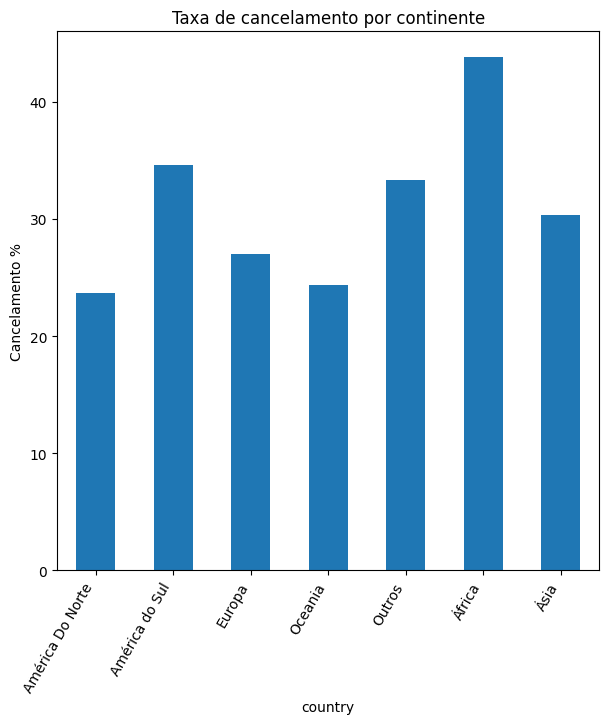

In [ ]:
plt.figure(figsize=(7,7))
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Taxa de cancelamento por continente')
plt.ylabel('Cancelamento %')
plt.xticks(rotation=60,ha='right')
plt.show()

In [ ]:
country_counts = tabela2['country'].value_counts()

# Criar um dicionário onde as chaves são os códigos de país e os valores são as contagens
country_data = {}
for country_code, count in country_counts.items():
    country_data[country_code] = count

# Criar um mapa do mundo

custom_style = pygal.style.Style(
  opacity='2.5',
  opacity_hover='0.1')

worldmap = pygal.maps.world.World(style=custom_style)
# worldmap = pygal.maps.world.World(style=pygal.style.LightColorizedStyle)

# Configurar o título do mapa
worldmap.title = 'Reservas de Hotéis por País'

# Adicionar os dados (países e suas contagens) ao mapa
worldmap.add('Reservas', country_data)


worldmap.render_to_file('hotel_reservations_worldmap.svg',
                              show_legend=True,
                              human_readable=True,
                              fill=True,
                              print_labels=True,
                              legend_at_bottom=True,
                              pretty_print=True,
                              print_values=True)

hotel_reservations_worldmap (3).svg

Percebemos que o maior número de cancelamentos vem da África, mesmo com o baixo número de reservas feitas. Isso se deve ao fato de diversos países africanos terem passaportes com baixíssima insenção de visto, dificultado a viagem  e ocasionado um cancelamento.

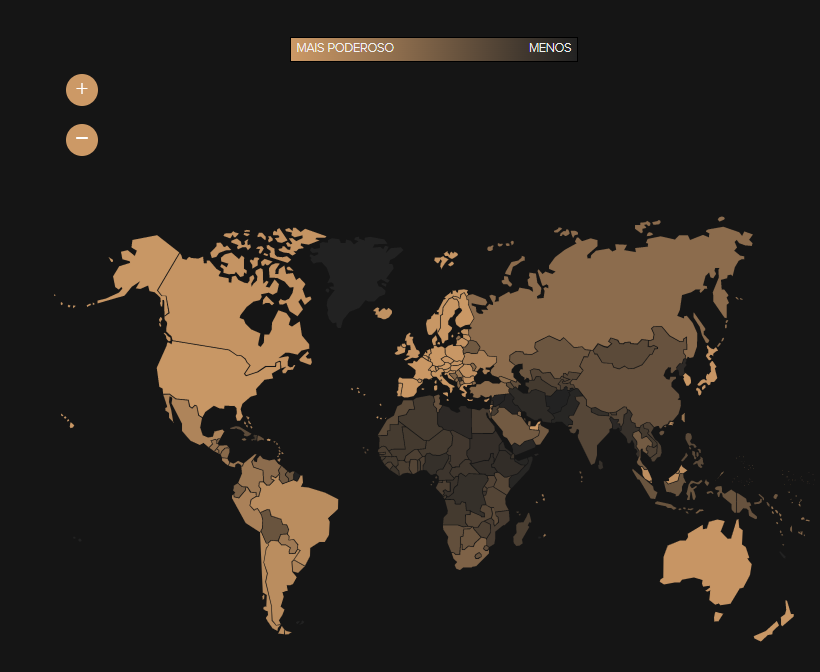

A imagem acima mostra a classificação global do poder do passaporte.

Os países sinalizados por cores mais escuras indicam que seus respectivos passaportes possuem uma baixa adesão à outros países.

Observamos um destaque negativo para o continente africano.

link para verificação: https://www.passportindex.org/pt/byRank.php

### **Estudando os clientes**

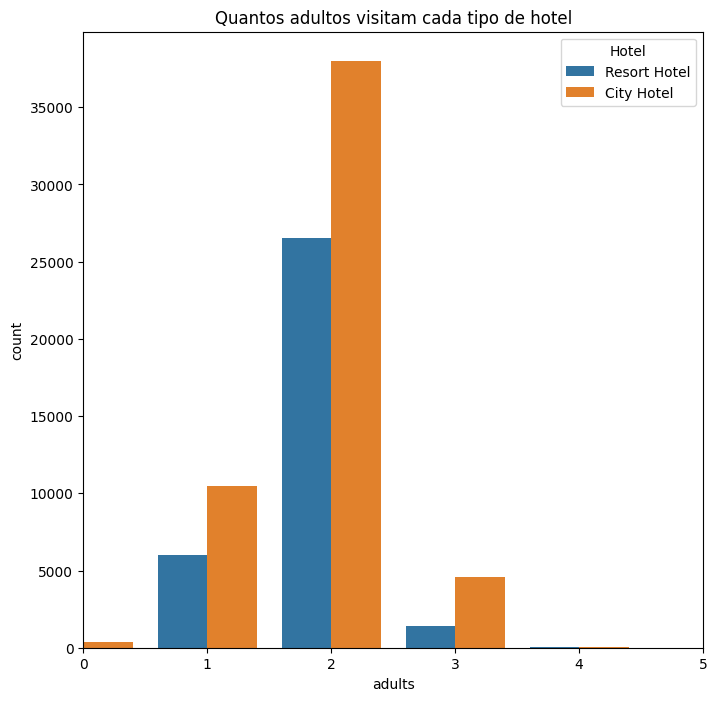

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=tabela,x='adults',hue='hotel').set_title("Quantos adultos visitam cada tipo de hotel")
plt.legend(loc='upper right', title='Hotel')
plt.xlim([0,5])
plt.show()

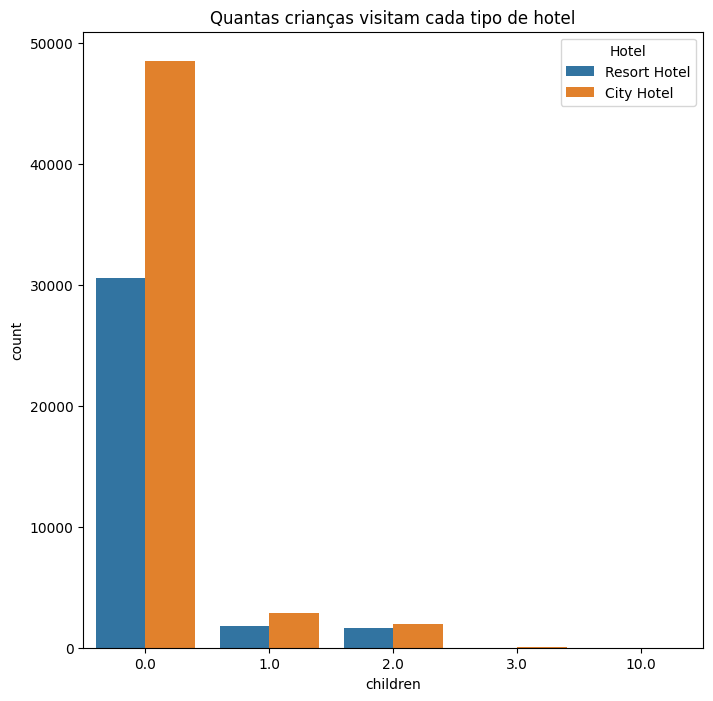

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=tabela,x='children',hue='hotel').set_title("Quantas crianças visitam cada tipo de hotel")
plt.legend(loc='upper right', title='Hotel')
plt.show()

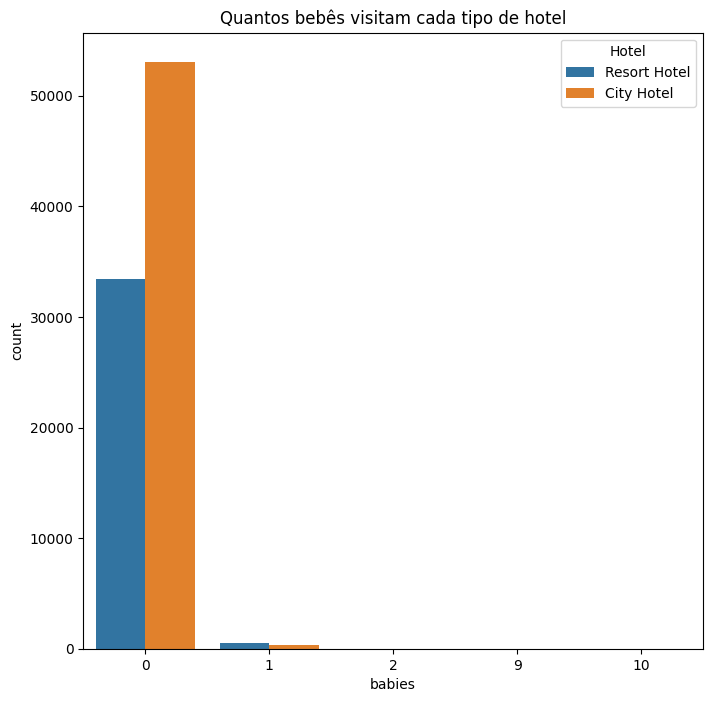

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=tabela,x='babies',hue='hotel').set_title("Quantos bebês visitam cada tipo de hotel")
plt.legend(loc='upper right', title='Hotel')
plt.show()

Vemos que a maioria dos clientes são adultos, que viajam sozinhos ou com outro adulto (um casal, por exemplo), que levam no máximo 1 ou 2 crianças e no máximo 1 bebê. Com esses dados, podemos traçar um público-alvo dos hotéis.

Matematicamente:

In [ ]:
couple_perc = round((tabela.adults.value_counts()[2]/sum(tabela.adults.value_counts()))*100)
print(couple_perc,"% dos adultos viajam com um outro adulto")

74 % dos adultos viajam com um outro adulto


Portanto, podemos supor que a maioria das pessoas fazem uma viagem em casal ou sozinhas. A criação de pacotes especiais para casais, com um jantar romântico incluso e uma decoração especial no quarto, por exemplo, pode ajudar a atrair mais clientes e aumentar sua taxa de reincidência.


Além de pensar em casais com filhos, criando algumas atrações para eles, como um parque com brinquedos.

### **Quantos hóspedes retornam à um hotel?**

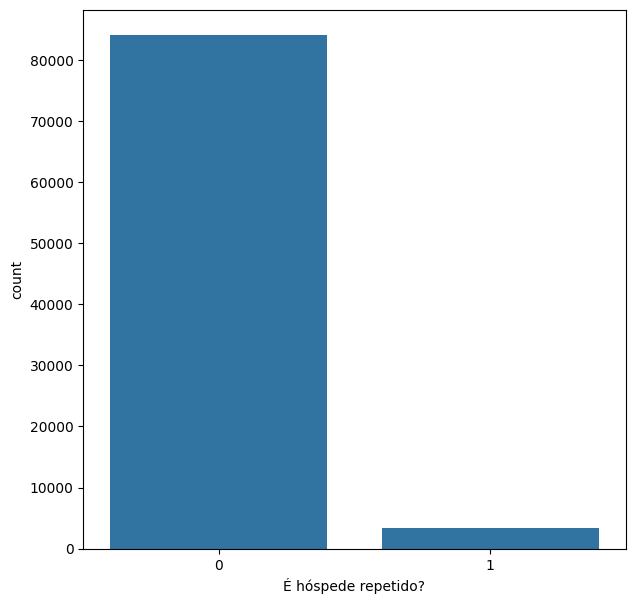

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='is_repeated_guest',data=tabela)
plt.xlabel('É hóspede repetido?')
plt.show()

Percebemos que a maioria dos hóspedes nunca se hospedaram anteriormente.

Uma estratégia para aumentar o retorno dos hóspedes no futuro, seria trazer incentivos para sua volta, como por exemplo descontos para uma eventual 2º vinda, ou criando uma espécie de cartão fidelidade, em que o cliente teria determinados benefícios ao se hospedar mais de uma vez no hotel.

### **Tipo de depósito**

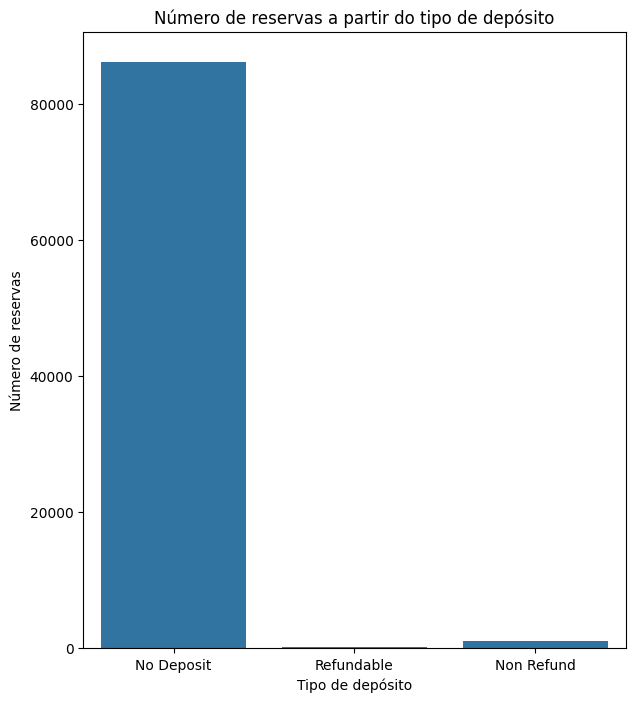

In [ ]:
plt.figure(figsize=(7,8))
sns.countplot(x='deposit_type',data=tabela)
plt.title('Número de reservas a partir do tipo de depósito')
plt.ylabel('Número de reservas')
plt.xlabel('Tipo de depósito')
plt.show()

A grande maioria das reservas é feita sem nenhum tipo de depósito.

In [ ]:
tbl=pd.crosstab(tabela.deposit_type,tabela.is_canceled,margins=True)
tbl

is_canceled,0,1,All
deposit_type,,,
No Deposit,63235,23016,86251
Non Refund,55,983,1038
Refundable,81,26,107
All,63371,24025,87396


In [ ]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

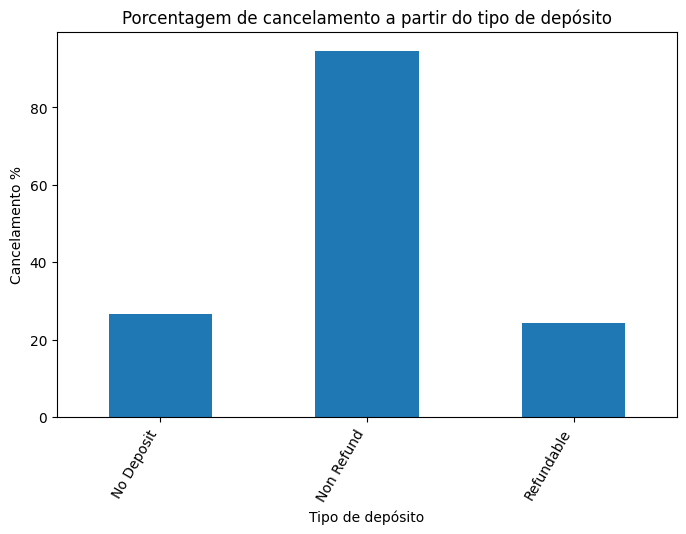

In [ ]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.title('Porcentagem de cancelamento a partir do tipo de depósito')
plt.ylabel('Cancelamento %')
plt.xlabel('Tipo de depósito')
plt.show()

Curiosamente, a maior quantidade de cancelamentos vem de depósitos sem reembolso. Com essa informação, é possível supor que os clientes desses hotéis, podendo ou não ser seu público-alvo, são pessoas com um bom poder aquisitivo, que não se incomodam muito com o reembolso de seus depósitos.

Além disso, podemos perceber que a maioria das reservas não tem um pagamento antecipado, o que pode encorajar as pessoas a cancelarem o hotel com mais facilidade. O hotel poderia rever essa política, visto que o mesmo estaria perdendo renda com esse quarto reservado por muito tempo e sem garantia de um retorno imediato.

# ***MACHINE LEARNING***

**Se livrando de colunas que não serão utilizadas**

In [ ]:
remover = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country']

tabela.drop(remover, axis = 1, inplace = True)

**Mudando variáveis com tipo object para tipo inteiro**

In [ ]:
tabela.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
deposit_type                       object
agent                             float64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

Primeiro fazendo a conversão da coluna 'reservation_status_date' individualmente

In [ ]:
# Conversão da Coluna 'reservation_status_date' para Datetime:
tabela['reservation_status_date'] = pd.to_datetime(tabela['reservation_status_date'])

# Extração de Ano, Mês e Dia da Coluna de Datas:
tabela['year'] = tabela['reservation_status_date'].dt.year
tabela['month'] = tabela['reservation_status_date'].dt.month
tabela['day'] = tabela['reservation_status_date'].dt.day

# remoção de colunas não necessárias
tabela.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

Utilizando o LabelEncoder para lidar com os dados categóricos

In [ ]:
# Lidando com dados categóricos (usando codificação LabelEncoder)
label_encoder = LabelEncoder()
tabela['hotel'] = label_encoder.fit_transform(tabela['hotel'])
tabela['meal'] = label_encoder.fit_transform(tabela['meal'])
tabela['distribution_channel'] = label_encoder.fit_transform(tabela['distribution_channel'])
tabela['reserved_room_type'] = label_encoder.fit_transform(tabela['reserved_room_type'])
tabela['deposit_type'] = label_encoder.fit_transform(tabela['deposit_type'])
tabela['customer_type'] = label_encoder.fit_transform(tabela['customer_type'])
tabela['market_segment'] = label_encoder.fit_transform(tabela['market_segment'])

Verificando novamente os tipos dos colunas

In [ ]:
tabela.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
deposit_type                        int64
agent                             float64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
year                              

## **Dividindo os dados em treino e teste**


Por fim é necessário realizar uma divisão de treino e teste do nosso banco de dados, para poder treinar o modelo e para testar o modelo, recebendo assim uma taxa de sucesso do modelo! Para manter a integridade do teste e do treino, importante fazer uma divisão aleatória dos dados.

In [ ]:
X = tabela.drop('is_canceled', axis=1)
y = tabela['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Aplicando os algorítmos de classificação e técnicas de avaliação**

**Support Vector Machine (SVM)**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
conf = confusion_matrix(y_test, y_pred_svm)
clf_report = classification_report(y_test, y_pred_svm)

print(f"Acurácia da SVM é: {acc_svm}")
print(f"Confusion Matrix:\n{conf}")
print(f"Relatório de Classificação:\n{clf_report}")

Acurácia da SVM é: 0.7255806857622334
Confusion Matrix:
[[19024     0]
 [ 7195     0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     19024
           1       0.00      0.00      0.00      7195

    accuracy                           0.73     26219
   macro avg       0.36      0.50      0.42     26219
weighted avg       0.53      0.73      0.61     26219



**Regressão Logística**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Acurácia da Logistic Regression é: {acc_lr}")
print(f"Confusion Matrix:\n{conf}")
print(f"Relatório de Classificação:\n{clf_report}")

Acurácia da Logistic Regression é: 0.7716922842213662
Confusion Matrix:
[[18673   351]
 [ 5635  1560]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     19024
           1       0.82      0.22      0.34      7195

    accuracy                           0.77     26219
   macro avg       0.79      0.60      0.60     26219
weighted avg       0.78      0.77      0.72     26219



**KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Acurácia do KNN é: {acc_knn}")
print(f"Confusion Matrix: \n{conf}")
print(f"Relatório de Classificação:\n{clf_report}")

Acurácia do KNN é: 0.8196727563980319
Confusion Matrix: 
[[18041   983]
 [ 3745  3450]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     19024
           1       0.78      0.48      0.59      7195

    accuracy                           0.82     26219
   macro avg       0.80      0.71      0.74     26219
weighted avg       0.81      0.82      0.80     26219



**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Acurácia da Decision Tree é: {acc_dtc}")
print(f"Confusion Matrix:\n{conf}")
print(f"Relatório de Classificação:\n{clf_report}")

Acurácia da Decision Tree é: 0.9282581334146993
Confusion Matrix:
[[18105   919]
 [  962  6233]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19024
           1       0.87      0.87      0.87      7195

    accuracy                           0.93     26219
   macro avg       0.91      0.91      0.91     26219
weighted avg       0.93      0.93      0.93     26219



**Random Forest**

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Acurácia da Random Forest é: {acc_rd_clf}")
print(f"Confusion Matrix:\n{conf}")
print(f"Classification Report:\n{clf_report}")

Acurácia da Random Forest é: 0.9355047866051337
Confusion Matrix:
[[18880   144]
 [ 1547  5648]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     19024
           1       0.98      0.78      0.87      7195

    accuracy                           0.94     26219
   macro avg       0.95      0.89      0.91     26219
weighted avg       0.94      0.94      0.93     26219



## Métricas para avaliação do modelo


Para facilitar a geração dos resultados, algumas métricas foram usadas no código anterior:



*   Matriz de confusão: A matriz de confusão é uma tabela que mostra a performance do modelo na classificação, comparando as previsões com os valores reais.
*   Acurácia: A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias.
*   Precisão: A precisão é a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias classificadas como positivas pelo modelo.
*   Recall (Sensibilidade):A revocação é a proporção de instâncias positivas corretamente classificadas em relação ao total de instâncias realmente positivas
*   F1-Score: O F1-Score é a média harmônica entre precisão e sensibilidade. É uma métrica que leva em consideração tanto falsos positivos quanto falsos negativos.
*   Support(Suporte):O suporte é o número real de instâncias de cada classe no conjunto de teste. Ajuda a entender a distribuição das classes.
*   Weighted Avg (Média Ponderada): A média ponderada é a média das métricas, dando pesos diferentes a cada classe com base em sua frequência no conjunto de dados.
*   Macro Avg (Média Macro): A média macro é a média não ponderada das métricas para cada classe. É útil quando você deseja dar importância igual a todas as classes.

## **Conclusões**

Em nosso melhor modelo preditivo, usando random forest, conseguimos um recall score de 0.99 e uma accuracy de 0.92.

Dessa forma, se uma reserva for sinalizada como uma reserva cancelável, poderemos enviar ao cliente um e-mail para confirmar sua reserva. Se eles não puderem confirmar, a reserva será considerada cancelada e o cliente deverá fazer uma nova reserva. Isso garantiria um método de reserva mais vigilante por parte do hotel e também reduziria o número de reservas falsas.

Como estávamos trabalhando aqui com uma quantidade limitada de dados, há uma boa chance de decaimento do modelo no futuro. Para combater isso, seria necessário remodelar e configurar periodicamente o modelo.

## **Fazendo uso da amostragem para avaliar os modelos** (k-fold cross-validation e bootstrap)



In [ ]:
# Modelos
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Métodos de amostragem
sampling_methods = {
    'k-fold': KFold(n_splits=5, shuffle=True, random_state=42),
    'bootstrap': ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
}

# Avaliação dos modelos com diferentes métodos de amostragem
for model_name, model in models.items():
    print(f"\nModelo: {model_name}")
    for sampling_name, sampling_method in sampling_methods.items():
        scores = cross_val_score(model, X, y, cv=sampling_method, scoring='accuracy')
        print(f"   {sampling_name} - Média de Acurácia: {scores.mean():.4f}, Desvio Padrão: {scores.std():.4f}")



Modelo: Decision Tree
   k-fold - Média de Acurácia: 0.9341, Desvio Padrão: 0.0045
   bootstrap - Média de Acurácia: 0.9279, Desvio Padrão: 0.0055

Modelo: KNN
   k-fold - Média de Acurácia: 0.8274, Desvio Padrão: 0.0016
   bootstrap - Média de Acurácia: 0.8213, Desvio Padrão: 0.0019

Modelo: Logistic Regression
   k-fold - Média de Acurácia: 0.7719, Desvio Padrão: 0.0029
   bootstrap - Média de Acurácia: 0.7716, Desvio Padrão: 0.0013

Modelo: SVM
   k-fold - Média de Acurácia: 0.7251, Desvio Padrão: 0.0019
   bootstrap - Média de Acurácia: 0.7247, Desvio Padrão: 0.0020

Modelo: Random Forest
   k-fold - Média de Acurácia: 0.9362, Desvio Padrão: 0.0036
   bootstrap - Média de Acurácia: 0.9336, Desvio Padrão: 0.0016


**Interpretando os resultados obtidos, temos:**

1.   Decision Tree:
    *   O modelo de árvore de decisão apresentou uma alta acurácia média, em torno de 93.41%, com um desvio padrão relativamente baixo (0.0045). Isso sugere um desempenho consistente em diferentes subconjuntos de dados.

2.   KNN:
    * O modelo KNN teve uma acurácia média em torno de 82.74%, com um desvio padrão baixo (0.0016). Isso indica um desempenho razoavelmente consistente, embora a acurácia média seja menor em comparação com a Decision Tree.

3.   Logistic Regression:
    * A regressão logística obteve uma acurácia média de 77.19%, com um desvio padrão de 0.0029. O desvio padrão mais alto sugere uma variabilidade maior no desempenho em diferentes conjuntos de dados, e a acurácia média é relativamente mais baixa.

4.   SVM:
    * O modelo SVM apresentou uma acurácia média de 72.51%, com um desvio padrão de 0.0019. A acurácia média é menor, e o desvio padrão é relativamente baixo, indicando uma consistência moderada no desempenho.

5.   Random Forest:
    * O modelo Random Forest obteve uma acurácia média elevada, em torno de 93.62%, com um desvio padrão baixo (0.0036). Isso sugere um desempenho consistente e alto em diferentes conjuntos de dados, semelhante à Decision Tree.



**Conclusões Gerais:**

Modelos como Decision Tree e Random Forest apresentaram desempenho geralmente alto e consistente.

KNN também teve uma consistência razoável, mas com uma acurácia média menor.

Regressão Logística e SVM tiveram acurácias médias mais baixas, com a regressão logística mostrando maior variabilidade no desempenho.

É importante observar que a escolha do modelo depende do contexto específico do problema, considerando trade-offs entre precisão, interpretabilidade e requisitos específicos da aplicação. Além disso, o ajuste de hiperparâmetros pode ser explorado para melhorar ainda mais o desempenho dos modelos.